# <u>TWITTER SENTIMENT ANALYSIS</u>

## 1]Importing Libraries 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2]Dataset

### Loading Dataset

In [2]:
tweets_df=pd.read_csv('twitter.csv')

### Overview of Dataset

In [3]:
tweets_df

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [4]:
tweets_df.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

### Summary of Dataset

In [5]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
#No missing data in any of the coloumns

### Statisical Summary of Dataset

In [7]:
tweets_df.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

In [8]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

### Dropping 'id' coloumn completely

In [9]:
tweets_df=tweets_df.drop(['id'],axis=1)

In [10]:
#Checking if "id" coloumn is dropped or not
tweets_df

label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[31962 rows x 2 columns]

In [11]:
#"id" coloumn is dropped

## 3]PERFORM DATA EXPLORATION

C:\Users\psrao\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

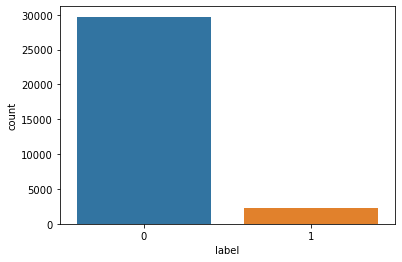

In [12]:
sns.countplot(tweets_df['label'],label='count')

In [13]:
#Calculating length of all tweets in tweet coloumn
tweets_df['length']=tweets_df['tweet'].apply(len)

In [14]:
tweets_df

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31960      1  @user #sikh #temple vandalised in in #calgary,...      67
31961      0                   thank you @user for you follow        32

[31962 rows x 3 columns]

### New Statistical Summary after length of tweets added

In [15]:
tweets_df.describe()

label        length
count  31962.000000  31962.000000
mean       0.070146     84.739628
std        0.255397     29.455749
min        0.000000     11.000000
25%        0.000000     63.000000
50%        0.000000     88.000000
75%        0.000000    108.000000
max        1.000000    274.000000

In [16]:
#smallest tweets are of length 11.00
#largest tweets qre of length 274.00

In [17]:
#grabbing the smallest length tweet
tweets_df[tweets_df['length']==11]['tweet']

25195    i love you 
Name: tweet, dtype: object

<AxesSubplot:>

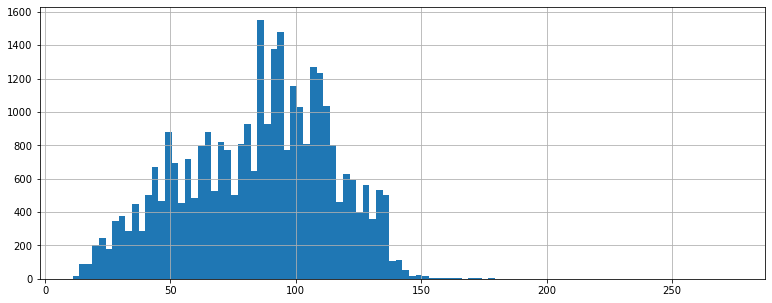

In [18]:
tweets_df['length'].hist(bins=100,figsize=(13,5))

In [19]:
#grabbing the average length tweet
#rounding mean value 84.739628 from above new statistical summary to either 84 or 85
tweets_df[tweets_df['length']==84]['tweet']

43       my mom shares the same bihday as @user   bihda...
220      g o a l s ð repost from @user #propey #ocea...
640      oscar tabarez talks luis suarezâs angry reac...
723       @user another hands &amp; feet complete!! ber...
742      because great things never came from comfo zon...
                               ...                        
31445    .@user on making choices to keep herself   as ...
31448    i'm a gordo. #passpo #florence #firenze #italy...
31509    just 3 keys that are found on your computer to...
31857    traveling happy #family   holidays #car #sunny...
31883    we spent #familytime by doing simple wefie, we...
Name: tweet, Length: 333, dtype: object

## 4]PLOT THE WORD CLOUD

**We are now going to create two new dataframes named 'positive' and 'negative'. We will store all the positive tweets(label==0) in 'positive' dataframe and all the negative tweets(label==1) in 'negative' dataframe.**

### Positive tweets(label==0) in positive dataframe

In [20]:
positive=tweets_df[tweets_df['label']==0]

In [21]:
#Displaying positive tweets in positive dataframe
positive

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31956      0  off fishing tomorrow @user carnt wait first ti...      61
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31961      0                   thank you @user for you follow        32

[29720 rows x 3 columns]

### Negative tweets(label==1) in negative dataframe

In [22]:
negative=tweets_df[tweets_df['label']==1]

In [23]:
#Displalying Negative(label==1) tweets in negative dataframe
negative

label                                              tweet  length
13         1  @user #cnn calls #michigan middle school 'buil...      74
14         1  no comment!  in #australia   #opkillingbay #se...     101
17         1                             retweet if you agree!       22
23         1    @user @user lumpy says i am a . prove it lumpy.      47
34         1  it's unbelievable that in the 21st century we'...     104
...      ...                                                ...     ...
31934      1  lady banned from kentucky mall. @user  #jcpenn...      59
31946      1  @user omfg i'm offended! i'm a  mailbox and i'...      82
31947      1  @user @user you don't have the balls to hashta...     112
31948      1   makes you ask yourself, who am i? then am i a...      87
31960      1  @user #sikh #temple vandalised in in #calgary,...      67

[2242 rows x 3 columns]

**Creating a list 'list_of_tweets' containing all the tweets**

In [24]:
list_of_tweets=tweets_df['tweet'].tolist()

In [25]:
#Displaying the list 'list_of_tweets'
list_of_tweets

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

**Joining all the elements/tweets in the list to one string called as 'tweets_string'** 

In [26]:
tweets_string=" ".join(list_of_tweets)

In [27]:
#Displaying the joined string 'tweets_string'
tweets_string

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦ the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦   @user @user welcome here !  i\'m   it\'s so #gr8 !   â\x86\x9d #ireland consumer price index (mom) climbed from pre

**INSTALLING WORD CLOUD**

In [28]:
!pip install wordcloud

**Plotting wordcloud of all tweets in string 'tweets_string'**

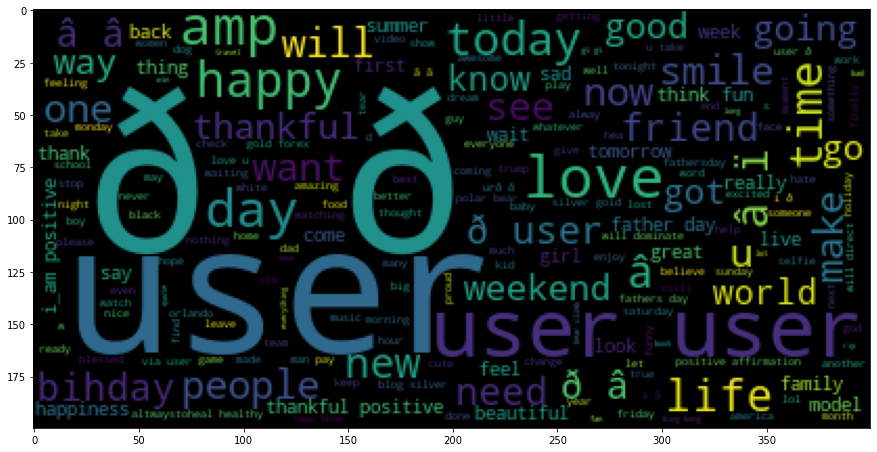

In [29]:
from wordcloud import WordCloud

plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(tweets_string))

### Plotting wordcloud for negative tweets in negative data frame

In [30]:
#Making list of all negative tweets
negative_list=negative['tweet'].tolist()
#Displaying negative_list
negative_list

["@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot  ",
 'no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins',
 'retweet if you agree! ',
 '@user @user lumpy says i am a . prove it lumpy.',
 "it's unbelievable that in the 21st century we'd need something like this. again. #neverump  #xenophobia ",
 '@user lets fight against  #love #peace ',
 "ð\x9f\x98©the white establishment can't have blk folx running around loving themselves and promoting our greatness  ",
 "@user hey, white people: you can call people 'white' by @user  #race  #identity #medâ\x80¦",
 'how the #altright uses  &amp; insecurity to lure men into #whitesupremacy    ',
 "@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ\x80¦",
 '@user why not @user mocked obama for being black.  @user @user @user @user #brexit',
 "#people aren't protesting #trump because a #republican won-

In [31]:
#Joining all tweets in list negative_list to one string 'negative_tweets'
negative_tweets=" ".join(negative_list)
#Displaying the joined string 'negative_tweets'
negative_tweets

'@user #cnn calls #michigan middle school \'build the wall\' chant \'\' #tcot   no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins retweet if you agree!  @user @user lumpy says i am a . prove it lumpy. it\'s unbelievable that in the 21st century we\'d need something like this. again. #neverump  #xenophobia  @user lets fight against  #love #peace  ð\x9f\x98©the white establishment can\'t have blk folx running around loving themselves and promoting our greatness   @user hey, white people: you can call people \'white\' by @user  #race  #identity #medâ\x80¦ how the #altright uses  &amp; insecurity to lure men into #whitesupremacy     @user i\'m not interested in a #linguistics that doesn\'t address #race &amp; . racism is about #power. #raciolinguistics bringsâ\x80¦ @user why not @user mocked obama for being black.  @user @user @user @user #brexit #people aren\'t protesting #trump because a #republican won-they do so because trump has fuhe

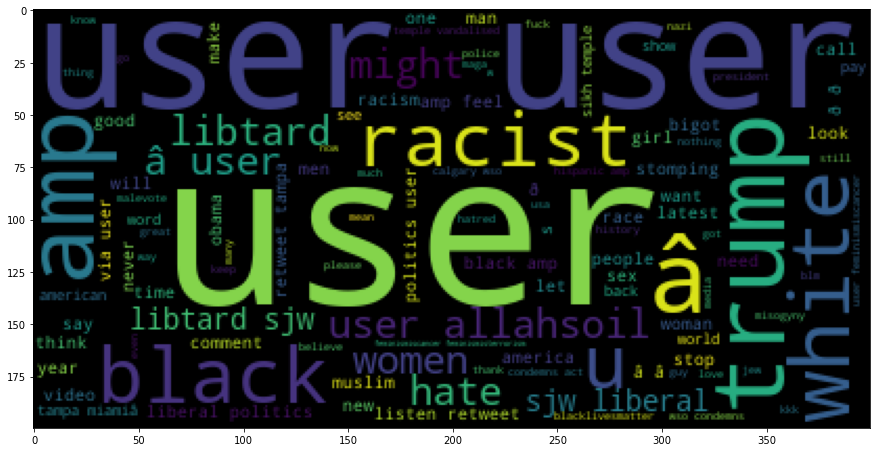

In [32]:
#plotting wordccloud for the negative tweets stored as a single string 'negative_tweets'
from wordcloud import WordCloud

plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_tweets))

## 5]CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [33]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
#importing nltk(Natural Language Tool Kit)
import nltk
#Downloading stopwords package
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')
 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\psrao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords
# We created a function 'message_cleaning'(can be named anything as its our own created function)
# We created function 'message cleaning' to perform removal of both punctuation and stopwords
# We passed 'message' as a example object on which our requirements run.
#If we call the function after creation on another dataframe or object it will do all the requirements and applications on that too. 
def message_cleaning(message):
    #Removing Punctuations 
    punc_remove = [char for char in message if char not in string.punctuation]
    #Joining the characters in to a single string after the removal of punctuation 
    punc_remove_join = ''.join(punc_remove)
    #Removing Stopwords
    PuncStop_remove = [word for word in punc_remove_join.split() if word.lower() not in stopwords.words('english')]
    #Returning the final data after removal of both Stoopwords and Punctuations 
    return PuncStop_remove

In [36]:
# Let's test the newly created function 'message_cleaning' by applying it on 'tweet' coloumn of tweets_df datframe
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [37]:
#Displaying the cleaned up version without Stopwords and Punctuations
print(tweets_df_clean[5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [38]:
#Displaying the original version
print(tweets_df['tweet'][5]) 

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [39]:
#We find that there are no punctuations and Stopwords in cleaned up version comapred to thee original version.
#Hence,We can say that our newly created function 'message_cleaning' is working perfectly fine.
#So,we can proceed to Count Vectorization(Tokenization) by calling this function 'message_cleaning'.

In [40]:
#importing CountVectorizer from sklearn or scikit learn package
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
# analyzer=message_cleaning is used because we are calling that function to remove Punctuations and Stopwords from whole tweet coloumn while applying CountVectorizer method simultaneously
# dtype=np.uint8 means 8-bit unsigned integer. It is used to make less memory usage here.
#count_vect_tweet object is instantiated or initialized
count_vect_tweet = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
#Using the initialized object count_vect to convert 'tweet' coloumn to sparse matrix stored in object 'count_matrix_tweet'(can keep any name)
count_matrix_tweet = count_vect_tweet.fit_transform(tweets_df['tweet'])

In [41]:
#To print all the unique words(features) in the corpus of 'tweet'colomn of tweets_df dataframe
print(count_vect_tweet.get_feature_names_out())

['0' '0000001' '00027' ... 'ó¾°\x80'
 'ó¾°\x80ó¾\x8d\x92ó¾\x86\x9fó¾\x86¤ó¾®\x9fó¾\x92ºó¾®\x9eó¾\x94\x9bó¾\x94\x83ó¾\x95\x86'
 'ó¾°\x80ó¾°\x80ó¾°\x80']


In [42]:
#Converting the sparse matrix 'count_matrix' to array format using .toarray() method and printing it
count_array_tweet=count_matrix_tweet.toarray()
print(count_array_tweet)  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [43]:
count_matrix_tweet.shape

(31962, 47386)

In [44]:
X = pd.DataFrame(count_array_tweet)

In [45]:
X

0      1      2      3      4      5      6      7      8      9      \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957      0      0      0      0      0      0      0      0      0      0   
31958      0      0      0      0      0      0      0      0      0      0   
31959      0      0      0      0      0      0      0      0      0      0   
31960      0      0      0      0      0      0      0      0      0      0   
31961      0      0      0      0      0      0      0      0      0      0   

       ...  47376  47377  47378  47379  47380  47381  47382  47383  47384  \
0      ...      0      0      0      0      0      0      0      0      0   
1      ...      0      0      0      0      0      0      0      0      0   
2      ...      0      0      0      0      0      0      0      0      0   
3      ...      0      0      0      0      0      0      0      0      0   
4      ...      0      0      0      0      0      0      0      0      0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957  ...      0      0      0      0      0      0      0      0      0   
31958  ...      0      0      0      0      0      0      0      0      0   
31959  ...      0      0      0      0      0      0      0      0      0   
31960  ...      0      0      0      0      0      0      0      0      0   
31961  ...      0      0      0      0      0      0      0      0      0   

       47385  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
31957      0  
31958      0  
31959      0  
31960      0  
31961      0  

[31962 rows x 47386 columns]

In [46]:
y = tweets_df['label']

## 6]TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER MODEL

In [47]:
X.shape

(31962, 47386)

In [48]:
y.shape

(31962,)

In [49]:
#importing train_test_split from scikit learn or sklearn library
from sklearn.model_selection import train_test_split

In [50]:
#We need to split all the data(X and y) into test and train.So creating objects as X_train, X_test, y_train, y_test
#We generally split training data as 80% and testing data as 20%
#So using train_test_split() function We split our data X,y with test_size=0.2 means testing data as 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [51]:
#importing MultinomialNB(Multinomial Naive bayes Classifier) from sklearn.naive_bayes library
#There are 3types of Naive Bayes Classifiers such as Gaussian,Multinomial and Bernoulli
#It is better to use Multinomial as it is good for text classification and document classification problems
from sklearn.naive_bayes import MultinomialNB

In [52]:
#Creating an object NB_classifier to get the MultiomialNB()
NB_classifier = MultinomialNB()
#Passing all the training data(X_train, y_train) into the object to train the object
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [53]:
#NB_classifier is now the trained object

In [54]:
#importing classification_report and confusion_report from sklearn.metrics
from sklearn.metrics import classification_report, confusion_matrix

### Predicting the Test set results

<AxesSubplot:>

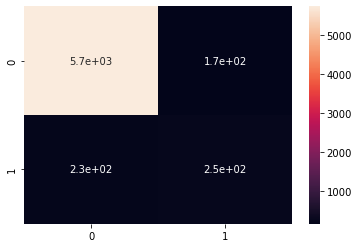

In [55]:
#We grabbed the trained onject NB_classifier which is trained on X_train,y_train
#then feed the X_test to NB_classifier object using predict() method
#We feed it to generate 'y_test_predict'(which are predicted results)
y_predict_test = NB_classifier.predict(X_test)
#y_test is true class and y_predict_test is prediction results
#We created confusion matrix between true class(y_test) and predicted results(y_predict_test) and store it in 'cm' object 
cm = confusion_matrix(y_test, y_predict_test)
#Plotting confusion matrix stored in object 'cm' using seaborn library(sns) in graphical method
sns.heatmap(cm, annot=True)

**Correctly Classified results are represented by True+ and True-**
- True positive:- 5.8+03
- True Negative:- 2.2e+02

**Missclassified results represented by False+ and False-**
- False positive:- 2.2+02
- False Negative:- 1.5e+02

In [56]:
print(cm)

[[5740  173]
 [ 231  249]]


### Classification report for y_test(which is a True class) and y_predict_test(which are Predictions)

In [57]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5913
           1       0.59      0.52      0.55       480

    accuracy                           0.94      6393
   macro avg       0.78      0.74      0.76      6393
weighted avg       0.93      0.94      0.93      6393



### Explanation of the above Classification report
- **We have two classes with label0 and label1**
- **Class with label0 has precision,recall and f1-score as 97% whereas class with label1 has precision,recall and f1-score  as 60%,51% and 55% respectively**
- **Accuracy is 94%**

### Precision-Recall Curve

In [58]:
from sklearn.metrics import precision_recall_curve

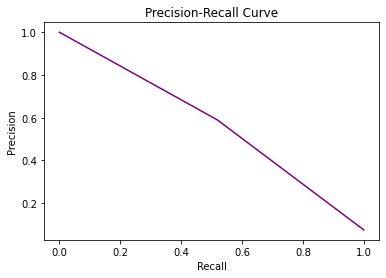

In [59]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_predict_test)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

## 7]Undersampling to handle unbalanced datasets

In [60]:
pip install -U imbalanced-learn

In [61]:
import imblearn

In [62]:
from imblearn.under_sampling import NearMiss

In [63]:
# Implementing Undersampling for Handling Imbalanced classes
nm = NearMiss()
X_res,y_res=nm.fit_resample(X,y)

In [64]:
print(X_res.shape)

(4484, 47386)


In [65]:
print(y_res.shape)

(4484,)


#### Visualizing the balanced data

C:\Users\psrao\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

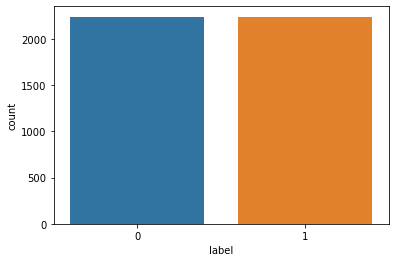

In [66]:
#Checking whether the classes 0 and 1 are balanced or not
sns.countplot(y_res,label='count')

#### Splitting the balanced data to test and train sets

In [67]:
#importing train_test_split from scikit learn or sklearn library
from sklearn.model_selection import train_test_split

In [68]:
#We need to split all the data(X and y) into test and train.So creating objects as X_train_b, X_test, y_train_b, y_test
#We generally split training data as 80% and testing data as 20%
#So using train_test_split() function We split our data X,y with test_size=0.2 means testing data as 20%
X_train_b, X_test, y_train_b, y_test = train_test_split(X_res,y_res,test_size=0.2)

### Naive Bayes Classifier for balanced data

In [69]:
#importing MultinomialNB(Multinomial Naive bayes Classifier) from sklearn.naive_bayes library
#There are 3types of Naive Bayes Classifiers such as Gaussian,Multinomial and Bernoulli
#It is better to use Multinomial as it is good for text classification and document classification problems
from sklearn.naive_bayes import MultinomialNB

In [70]:
#Creating an object NB_classifier to get the MultiomialNB()
NB_classifier = MultinomialNB()
#Passing all the training data(X_train, y_train) into the object to train the object
NB_classifier.fit(X_train_b, y_train_b)

MultinomialNB()

In [71]:
#NB_classifier is now the trained object

In [72]:
#importing classification_report and confusion_report from sklearn.metrics
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

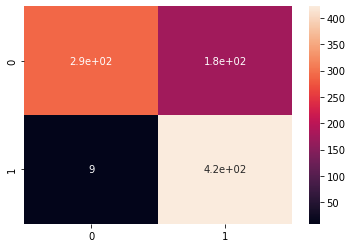

In [73]:
#We grabbed the trained onject NB_classifier which is trained on X_train,y_train
#then feed the X_test to NB_classifier object using predict() method
#We feed it to generate 'y_test_predict'(which are predicted results)
y_predict_test_b = NB_classifier.predict(X_test)
#y_test is true class and y_predict_test is prediction results
#We created confusion matrix between true class(y_test) and predicted results(y_predict_test) and store it in 'cm' object 
cm = confusion_matrix(y_test, y_predict_test_b)
#Plotting confusion matrix stored in object 'cm' using seaborn library(sns) in graphical method
sns.heatmap(cm, annot=True)

In [74]:
print(cm)

[[291 175]
 [  9 422]]


In [75]:
print(classification_report(y_test,y_predict_test_b))

              precision    recall  f1-score   support

           0       0.97      0.62      0.76       466
           1       0.71      0.98      0.82       431

    accuracy                           0.79       897
   macro avg       0.84      0.80      0.79       897
weighted avg       0.84      0.79      0.79       897



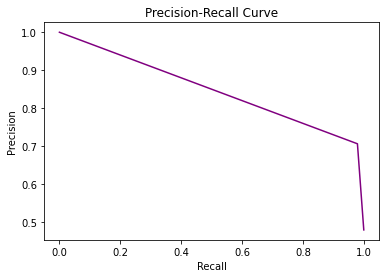

In [76]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test,y_predict_test_b)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()